<div style="text-align: right" align="right"><i>Peter Norvig, December 2024</i></div>

# Advent of Code 2024

I  enjoy doing the [**Advent of Code**](https://adventofcode.com/) (AoC) programming puzzles, so here we go for 2024!  Our old friend [@GaryJGrady](https://x.com/garyjgrady) is here to provide illustrations:

<a href="https://x.com/garyjgrady"><img src="https://pbs.twimg.com/media/Gdp709FW8AAq2_m?format=jpg&name=medium" width=400 alt="GaryJGrady cartoon"></a>

I traditionally start by loading up my [**AdventUtils.ipynb**](AdventUtils.ipynb) notebook (same as last time except for the `current_year`):

In [2]:
%run AdventUtils.ipynb
current_year = 2024

print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]


Each day's solution consists of three parts, making use of my `parse` and `answer` utilities:
- **Reading the day's input**. E.g. `pairs = parse(1, ints)`. 
- **Solving Part One**. Find the solution and record it with, e.g., `answer(1.1, 4, lambda: 2 + 2)`.
- **Solving Part Two**. Find the solution and record it with, e.g., `answer(1.2, 9, lambda: 3 * 3)`.

The function `parse` assumes that the input is a sequence of records (default one per line), each of which should be parsed in some way (default just left as a string, but the argument `ints` says to treat each record as a tuple of integers). The function `answer` records the correct answer (for regression testing), and records the run time (that's why a `lambda:` is used).

To fully understand each day's puzzle, and to follow along the drama involving Santa, the elves, the elephants, the Chief Historian, and all the rest, you need to read the descriptions on the [**AoC**](https://adventofcode.com/) site, as linked in the header for each of my day's solutions, e.g. [**Day 1**](https://adventofcode.com/2023/day/1) below. Since you can't read Part 2 until you solve Part 1, I'll partially describe Part 2 in this notebook. But I can't copy the content of AoC here, nor show my input files; you need to go to the site for that.



 

# [Day 1](https://adventofcode.com/2024/day/1) Historian Hysteria

According to the narrative, North Pole Historians created two lists of **location IDs**. We can parse them as a sequence of pairs of integers, and then use the transpose function, `T`, from my [AdventUtils](AdventUtils.ipynb) to get two lists of ID numbers:

In [5]:
left, right = location_ids = T(parse(1, ints))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
38665   13337
84587   21418
93374   50722
68298   57474
54771   18244
49242   83955
66490   44116
65908   51323
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(38665, 13337)
(84587, 21418)
(93374, 50722)
(68298, 57474)
(54771, 18244)
(49242, 83955)
(66490, 44116)
(65908, 51323)
...


<img src="https://pbs.twimg.com/media/GdvPVOpXcAEZ34_?format=jpg&name=medium" width=400>

### Part 1: What is the total distance between your lists?

The **distance** between two numbers is the absolute value of their difference, and the **total distance** between two lists is the sum of the distances between respective pairs, where "respective" means to sort each list and then take the distance between the first element of each list, plus the distance between the second element of each list, and so on. (I use the transpose utility function, `T`, to turn the input sequence of 1000 pairs into two lists, each of 1000 integers.)

In [7]:
def total_distance(left: Ints, right: Ints) -> int:
    """Total distance between respective list elements, after sorting."""
    return sum(abs(a - b) for a, b in zip(sorted(left), sorted(right)))

answer(1.1, 1830467, lambda:
       total_distance(left, right))

Puzzle  1.1:   .0001 seconds, answer 1830467         ok

### Part 2: What is their similarity score?

The **similarity score** is the sum of each element of the left list times the number of times that value appears in the right list.

In [9]:
def similarity_score(left: Ints, right: Ints) -> int:
    """The sum of each x in `left` times the number of times x appears in `right`."""
    counts = Counter(right)
    return sum(x * counts[x] for x in left)

answer(1.2, 26674158, lambda:
       similarity_score(left, right))

Puzzle  1.2:   .0001 seconds, answer 26674158        ok

# [Day 2](https://adventofcode.com/2024/day/2): Red-Nosed Reports

Today's input is a sequence of **reports**, each of which is a sequence of integers:

In [11]:
reports = parse(2, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
74 76 78 79 76
38 40 43 44 44
1 2 4 6 8 9 13
65 68 70 72 75 76 81
89 91 92 95 93 94
15 17 16 18 19 17
46 47 45 48 51 52 52
77 78 79 82 79 83
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(74, 76, 78, 79, 76)
(38, 40, 43, 44, 44)
(1, 2, 4, 6, 8, 9, 13)
(65, 68, 70, 72, 75, 76, 81)
(89, 91, 92, 95, 93, 94)
(15, 17, 16, 18, 19, 17)
(46, 47, 45, 48, 51, 52, 52)
(77, 78, 79, 82, 79, 83)
...


### Part 1: How many reports are safe?

A report is **safe** if it is  monotonically strictly increasing or strictly decreasing, and if no difference between adjacent numbers is greater than 3 in absolute value.

In [13]:
def is_safe(report: Ints) -> bool:
    """A report is safe if all differences are either in {1, 2, 3} or in {-1, -2, -3}."""
    deltas = diffs(report)
    return deltas.issubset({1, 2, 3}) or deltas.issubset({-1, -2, -3})
    
def diffs(report: Ints) -> set:
    """The set of differences between adjacent numbers in the report."""
    return {report[i] - report[i - 1] for i in range(1, len(report))}

assert diffs((7, 6, 4, 2, 1)) == {-1, -2}
assert is_safe((7, 6, 4, 2, 1))  == True

In [14]:
answer(2.1, 257, lambda:
       quantify(reports, is_safe))

Puzzle  2.1:   .0004 seconds, answer 257             ok

### Part 2: How many reports are safe using the Problem Dampener?

The **problem dampener** says that a report is safe if you can drop one element and get a safe report.

In [16]:
def is_safe_with_dampener(report: Ints) -> bool:
    """Is there any way to drop one element of `report` to get a safe report?"""
    return any(map(is_safe, drop_one(report)))

def drop_one(report) -> Iterable:
    """All ways of dropping one element of the input report."""
    return (report[:i] + report[i + 1:] for i in range(len(report)))

assert set(drop_one('1234')) == {'234', '134', '124', '123'}

In [17]:
answer(2.2, 328, lambda:
       quantify(reports, is_safe_with_dampener))

Puzzle  2.2:   .0022 seconds, answer 328             ok

# [Day 3](https://adventofcode.com/2024/day/3): Mull It Over

Today's input is a computer program with some corrupted characters. The program has multiple lines, but lines don't matter, so I will concatenate them into one big string:

In [19]:
program = cat(parse(3))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 6 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
where(536,162)~'what()what()how(220,399){ mul(5,253);mul(757,101)$where()@why()who()&when()from( ...
}?~who()select()-mul(316,505)&%*how()mul(363,589)>?%-:)where()~{{mul(38,452)select()%>[{]%>%mul( ...
?>where(911,272)'mul(894,309)~+%@#}@#why()mul(330,296)what()mul(707,884)mul;&}<{>where()$why()]m ...
> (when()[where()/#!/usr/bin/perl,@;mul(794,217)select():'])select()mul(801,192)why()&]why()/:]* ...
,+who():mul(327,845)/ >@[>@}}mul(86,371)!~&&~how(79,334)mul(637,103)why()mul(358,845)-#~?why(243 ...
where()#{*,!?:$mul(204,279)what()!{ what()mul(117,94)!select()>:mul(665,432)#don't()!!<!? mul(50 ...


<a href="https://x.com/garyjgrady"><img src="https://pbs.twimg.com/media/Gd5ZSI9XEAAAzQh?format=jpg&name=small" width=400 alt="GaryJGrady cartoon"></a>


### Part 1: What do you get if you add up all of the results of the multiplications?

For Part 1, just look for instructions of the form "mul(*digits*,*digits*)", using a regular expression and `re.findall`. Perform each of these multiplications and add them up, and ignore all other characters/instructions:

In [21]:
def execute(program: str) -> int:
    """The sum of the results of the multiply instructions."""
    return sum(prod(ints(m)) for m in re.findall(multiplications, program))

multiplications = r'mul\(\d+,\d+\)'

In [22]:
answer(3.1, 156388521, lambda: 
       execute(program))

Puzzle  3.1:   .0005 seconds, answer 156388521       ok

### Part 2: What do you get if you add up all of the results of just the enabled multiplications?

For Part 2, the instruction "don't()"  says to disable (ignore) following multiply instructions until a "do()" instruction enables them again. I will define the function `enabled`, which returns the part of the program that is enabled, by susbstituting a space for the "don't()...do()" sequence.

In [24]:
def enabled(program: str) -> str:
    """Just the part of the program that is enabled; remove "don't()...do()" text."""
    return re.sub(r"don't\(\).*?(do\(\)|$)", " ", program)

In [25]:
answer(3.2, 75920122, lambda:
       execute(enabled(program)))

Puzzle  3.2:   .0004 seconds, answer 75920122        ok

# [Day 4](https://adventofcode.com/2024/day/4): Ceres Search

Today's puzzle is a 2D word-search puzzle:

In [27]:
xmas_grid = Grid(parse(4))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 140 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
MASAMXMSSXXMAMXXMXMASXMASXMMSMSMMMAXMASASMMSSMSXAXMASMMSMMMSSMSASMSSSSMSMSMXXMXMAXAMXMSMSSXSAMXM ...
MASMMXMASAXASMSMMMSAMXSMSAMXAAAAAXAMXASXAMAAAAMMSMMMMMASXAAAAMMAMAMMASAAAAXMXMSSSSSSMMSAMAXAXXSM ...
MMXAXMMMSXMAMAAXAAXAAAXXSMMSMSMSMXAXMXSMMMMSSMXAMXAAXMAMMMMSSMMAMAMMAMMMMMXSAAXAAMMAXXSAMXMSMAXM ...
SXSAMASASMSXMSMSMSSMMMMMMXAMXMMXMASMMMMAXXAAAMMMSSSSSMASXXAAXASMSXXMXSXSXSASMSMMSMSAMMMAMXAAMASX ...
AAAXXXMASASXMXMAXXMMASAASMXSASASXAAAAMSSMMMSXMAAMMMMMXAXMMMMSAMXAMASAMXSAMASXXAXAAMAMXSAMXSXSMMA ...
MSMMXXMMMAMAMMMMMMXSAXXAMMMMXSAXMMXXAMXAAMMXMASXMAAASMMXAAMXAXAMMMAMAMAMAMXMASXMMXMAAXMAXMAMXMSA ...
MXAXAMXXMMMMSAMAASMMMSMMASASAMAMAXMSXMSMMXAMXAXMMSSXSASXSSSMAMSMXMXSAMSSSMAMXMXAMAXXMMSAXAXMMXMA ...
ASXMMXSAMXAASXXMXSAAAXASAMMMASMSSSMAAMMXMMSSMASAMAMMMAMMAXMAXMASXM

### Part 1: How many times does XMAS appear?

We just have to find how many times the word "XMAS" appears in the grid, horizontally, vertically, or diagonally, forwards or backwards.  The variable `directions8` contains those eight directions (as (delta-x, delta-y) pairs). So examine each square of the grid and if it contains "X", see in how many of the directions it spells "XMAS". (Note that locations in the grid are denoted by `(x, y)` coordinates, as are directions (e.g., `(1, 0)` is the `East` direction. The functions `add` and `mul` do addition and scalar multiplication on these vectors.)

In [29]:
def word_search(grid: Grid, word='XMAS') -> int:
    """How many times does the given word appear in the grid?"""
    return quantify(grid_can_spell(grid, start, dir, word) 
                    for start in grid 
                    if grid[start] == word[0]
                    for dir in directions8)

def grid_can_spell(grid, start, dir, word):
    """Does `word` appear in grid starting at `start` and going in direction `dir`?"""
    return all(grid[add2(start, mul(dir, i))] == word[i] for i in range(len(word)))

In [30]:
answer(4.1, 2401, lambda:
       word_search(xmas_grid))

Puzzle  4.1:   .0337 seconds, answer 2401            ok

### Part 1: How many times does an X-MAS appear?

Upon further review, the goal is not to find "XMAS" byt rather X-"MAS"; that is, two "MAS" words in an X pattern. The pattern can be any of these four:

     M.S     S.M     M.M     S.S
     .A.     .A.     .A.     .A.
     M.S     S.M     S.S     M.M

I decided to find these by first looking for each the middle letter ("A") in the grid, and then, for each "A" and for each of the four pairs of diagonal directions, see if the target word ("MAS") can be spelled in both directions:

In [32]:
diagonal_pairs = ([SE, NE], [SW, NW],  [SE, SW], [NE, NW])

def x_search(grid: Grid, word='MAS') -> int:
    """How many times does an X-MAS appear in the grid?"""
    return quantify((grid_can_spell(grid, sub(mid_pos, dir1), dir1, word) and
                     grid_can_spell(grid, sub(mid_pos, dir2), dir2, word))
                    for mid_pos in grid if grid[mid_pos] == word[1]
                    for dir1, dir2 in diagonal_pairs)

answer(4.2, 1822, lambda:
       x_search(xmas_grid))

Puzzle  4.2:   .0266 seconds, answer 1822            ok

# [Day 5](https://adventofcode.com/2024/day/5): Print Queue

Today's puzzle involves a **sleigh launch safety manual** that needs to be updated. The day's input is in two parts: the first a set of **rules** such as "47|53", which means that page 47 must be printed before page 53; and the second a list of **updates** of the form "75,47,61,53,29", meaning that those pages are to be printed in that order.

<img src="https://pbs.twimg.com/media/GeEU0XgWAAARMw-?format=jpg&name=medium" width=400>

I mostly like my `parse` function, but I admit it is not ideal when an input file has two parts like this. I'll parse the two parts into paragraphs, and then call `parse` again on each paragraph:

In [34]:
manual  = parse(5, sections=paragraphs)
rules   = set(parse(manual[0], ints))
updates = parse(manual[1], ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1366 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
48|39
39|84
39|23
95|51
95|76
95|61
14|52
14|49
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
48|39
39|84
39|23
95|51
95|76
95|61
14|52
14|49
14|39
14|53
85|19
85|25
85|61
85|35
85|58
74|86
 ...
61,58,51,32,12,14,71
58,25,54,14,12,94,32,76,39
35,53,26,77,14,71,25,76,85,55,51,49,95
32,91,76, ...


In [35]:
assert (48, 39) in rules # `rules` is a set of (earlier, later) page number pairs
assert updates[0] == (61, 58, 51, 32, 12, 14, 71) # `updates` is a sequence of page number tuples

### Part 1: What do you get if you add up the middle page number from the correctly-ordered updates?

I'll define `is_correct` to determine if an update is in the correct order, and `sum_of_correct_middles` to add up the middle numbers of the correct updates:

In [37]:
def sum_of_correct_middles(rules: Set[Ints], updates: Tuple[Ints]) -> int:
    """The sum of the middle elements of each update that is correct."""
    return sum(middle(update) for update in updates if is_correct(update, rules))

def is_correct(update: Ints, rules: Set[Ints]) -> bool:
    """An update is correct if no pair of pages violates a rule in the rules set."""
    return not any((second, first) in rules for (first, second) in combinations(update, 2))

def middle(sequence) -> object: return sequence[len(sequence) // 2]

In [38]:
answer(5.1, 5762, lambda:
       sum_of_correct_middles(rules, updates))

Puzzle  5.1:   .0007 seconds, answer 5762            ok

### Part 2: What do you get if you add up the middle page numbers after correctly re-ordering the incorrect updates?

In Part 2 we have to find the incorrect updates, re-order them into a correct order, and again sum the middle page numbers.
Since I have already defined `is_correct`, i could just generate all permutations of each update and find one that `is_correct`. That would work great if the longest update consists of only 5 pages, as it does in the example input. But what is the longest update in the actual input?

In [40]:
max(map(len, updates))

23

That's not great. With 23 numbers there are 23! permutations, which is over 25 sextillion. So instead, here's my strategy:

- `sum_of_corrected_middles` will find the incorrect rules, perform a correction on each, and sum the middle numbers.
- `correction` will sort an update, obeying the rules. It used to be that Python's `sort` method allowed a `cmp` keyword to compare two values; there is vestigial support for this with the `functools.cmp_to_key` function. I will **sort** each update so that page *m* comes before page *n* if (*m*, *n*) is in the rules.
- Sorting will be BOUT a sextillion times faster than enumerating permutations.

In [42]:
def sum_of_corrected_middles(rules, updates) -> int:
    """The sum of the middle elements of each update that is correct."""
    incorrect = [update for update in updates if not is_correct(update, rules)]
    corrected = [correction(update, rules) for update in incorrect]
    return sum(map(middle, corrected))
    
def correction(update: Ints, rules) -> Ints:
    """Reorder the update to make it correct."""
    def rule_lookup(m, n): return +1 if (m, n) in rules else -1 
    return sorted(update, key=functools.cmp_to_key(rule_lookup))

In [43]:
answer(5.2, 4130, lambda:
       sum_of_corrected_middles(rules, updates))

Puzzle  5.2:   .0009 seconds, answer 4130            ok

I have to say, I'm pleased that this day I got both parts right with no errors (and in fact, the same for the previous days). I was worried I might have my `+1` and `-1` backwards in `cmp_to_key`, but so far, everything has gone smoothly. (However, even if I started solving the second the puzzles are released (which I don't), I wouldn't show up on the leaderboard;  I'm still *way* slower than the skilled contest programmers.

# [Day 6](https://adventofcode.com/2024/day/6): Guard Gallivant

Today's input is a 2D map of the manufacturing lab, with "`.`" indicating an empty space, "`#`" indicating an obstruction, and "`^`" indicating the position of the security guard.

In [46]:
lab_grid = Grid(parse(6))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 130 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
........#........................................#......#........#.............................. ...
....................................#......#.....#............#.............#..........#........ ...
......................#.......................................................#................. ...
.......#..#..#....#...#...#....#..............#......#.......#...#................#.......#..... ...
......................#....##...#.......#....#.......................................#.......... ...
...#............................#........................................#...................... ...
....................#............#...............#......#.........#...........#................. ...
............................#......#...#................#.........

### Part 1: How many distinct positions will the guard visit before leaving the mapped area?

The guard follows this protocol: If there is something directly in front of you, turn right 90 degrees.
Otherwise, take a step forward.

I'll define `follow_path` to output a list of all the positions the guard occupies. I realize the puzzle is only asking for a count of the positions, but the path might be useful for Part 2, or for debugging, so I'll return it. I worried that it is also possible for a path to become a loop, but the problem statement says that can't happen, so I won't test for it.

In [48]:
def follow_path(grid: Grid, guard='^', facing=North) -> List[Point]:
    """A list of all points in the path followed by the guard."""
    path = grid.findall(guard) # A one-element list of positions, e.g. [(3, 4)]
    while (ahead := add2(path[-1], facing)) in grid:
        if grid[ahead] == '#':
            facing = make_turn(facing, 'R')
        else:
            path.append(ahead)
    return path

In [49]:
answer(6.1, 5329, lambda: 
       len(set(follow_path(lab_grid))))

Puzzle  6.1:   .0016 seconds, answer 5329            ok

I initially had a **bug**; I asked for the length of the path, not the length of the **set** of positions in the path.
                                  
### Part 2: How many different positions could you choose for an obstruction to put the guard in a loop?

The historians would like to place a single obstacle so that the guard *will* get stuck in a loop, rather than exiting the grid. They want to know all possible positions for the obstacle. What do we know about such positions?
- An obstacle  position must be somewhere on the guard's path, otherwise it would have no effect.
- The instructions say it can't be the guard's initial position.
- A loop is when the guard's path returns to the same position with the same facing. This suggests that my Part 1 solution was not completely helpful: to find duplicate positions in the path I would need a set of position/facing pairs, not just positions.
- I can make slightly less work by only storing the corners of the path: the places where the guard turns. 
- The simplest approach for finding obstacle positions is to temporarily place an obstacle on each point on the path, one at a time, and see if it leads to a loop.
- There are 5,329 positions on the path, so the runtime should be about 5,000 times longer than Part 1; on the order of 10 seconds or so. I'll try it, and if it seems too slow, I'll try to think of something better.

In [51]:
def is_loopy_path(grid: Grid, guard_pos, facing=North) -> bool:
    """Does the path followed by the guard form a loop?"""
    path = {(guard_pos, facing)}
    while (ahead := add2(guard_pos, facing)) in grid:
        if grid[ahead] == '#':
            facing = make_turn(facing, 'R')
            if (guard_pos, facing) in path:
                return True
            path.add((guard_pos, facing))
        else:
            guard_pos = ahead
    return False
    
def find_loopy_obstacles(grid: Grid) -> Iterable[Point]:
    """All positions in which placing an obstacle would result in a loopy path for the guard."""
    guard_pos = the(grid.findall('^'))
    for pos in set(follow_path(grid)) - {guard_pos}:
        grid[pos] = '#' # Temporarily place an obstacle 
        if is_loopy_path(grid, guard_pos):
            yield pos
        grid[pos] = '.' # Remove the obstacle

In [52]:
answer(6.2, 2162, lambda:
       quantify(find_loopy_obstacles(lab_grid)))

Puzzle  6.2:  1.9691 seconds, answer 2162            ok

That was a bit slow, but I'll take it. I had a **bug** when I was keeping a set of previously visited states to detect loops; the bug went away when I switched to the step-count limit.

# [Day 7](https://adventofcode.com/2024/day/7): Bridge Repair

The narrative for today involves fixing a bridge, and each line of our input represents a calibration equation for the bridge. Unfortunately, some nearby elephants stole all the operators from the equations, so all that is left are the integers:

In [55]:
equations = parse(7, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 850 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
202998336: 686 9 7 62 2 673
19275222: 361 3 7 170 65 5 223
23101: 7 694 916 4 6
2042426: 6 34 2 423 3
40369523: 8 880 91 45 23
46629044796: 990 471 4 4 796
1839056: 3 42 2 4 3 258 703 4 8
26205: 2 9 5 9 9 4 3 7 44 5 8 7
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 850 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(202998336, 686, 9, 7, 62, 2, 673)
(19275222, 361, 3, 7, 170, 65, 5, 223)
(23101, 7, 694, 916, 4, 6)
(2042426, 6, 34, 2, 423, 3)
(40369523, 8, 880, 91, 45, 23)
(46629044796, 990, 471, 4, 4, 796)
(1839056, 3, 42, 2, 4, 3, 258, 703, 4, 8)
(26205, 2, 9, 5, 9, 9, 4, 3, 7, 44, 5, 8, 7)
...


<img src="https://pbs.twimg.com/media/GeOKVYiX0AAwNMy?format=jpg&name=medium" width=400> 

### Part 1: What is the total calibration result of possibly true equations?

Our task is to find operators to balance each equation. The input "`3267: 81 40 27`" can be made into the equation "`3267 = 81 + 40 * 27`", with the understanding that all evaluations are done left-to-right, so this is "`3267 = ((81 + 40) * 27)`". The two allowable operators are addition and multiplication. Our task is to compute the sum of all the equations that can be balanced.

The straightforward approach is to try both operators on every number. If there are *n* numbers in an equation then there will be 2<sup>*n*-2</sup> possible equations; is that going to be a problem?

In [58]:
max(map(len, equations))

13

No problem! With 13 numbers on a line there are 2<sup>11</sup> = 2048 equations; a small number.  I'll define `can_be_calibrated` to keep a set of `results`, updating the set for each new number and each possible operator. Although the instructions were a bit vague, it appears that when they talk about "numbers" in the equations they mean "positive integers". That means that neither addition nor multiplication can cause a number to decrease, so once a result exceeds the target, we'll drop it.

In [60]:
def can_be_calibrated(numbers: ints, operators=(operator.add, operator.mul)) -> bool:
    """Can the tuple of numbers be calibrated as a correct equation using '+' and '*' ?"""
    target, first, *rest = numbers
    results = {first} # A set of all possible results of the partial computation
    for y in rest:
        results = {op(x, y) for x in results if x <= target for op in operators}
    return target in results

In [61]:
answer(7.1, 1985268524462, lambda:
    sum(numbers[0] for numbers in equations if can_be_calibrated(numbers)))

Puzzle  7.1:   .0211 seconds, answer 1985268524462   ok

### Part 2: What is the total calibration result of possibly true equations, allowing concatenation?

In Part 2, we add a third operator: concatentation. The equation "`192: 17 8 14`" can be balanced by concatenated 17 and 8 to get 178, and then adding 14: "`192 = ((17 || 8) + 14)`". With three operators, the equation with 11 operators now has 3<sup>11</sup> = 177,147 possibilities, almost 100 times more than Part 1, so this will take a few seconds:

In [63]:
operators3 = (operator.add, operator.mul, lambda x, y: int(str(x) + str(y)))
    
answer(7.2, 150077710195188, lambda:
       sum(numbers[0] for numbers in equations if can_be_calibrated(numbers, operators3)))

Puzzle  7.2:  1.0677 seconds, answer 150077710195188 ok

# [Day 8](https://adventofcode.com/2024/day/8): Resonant Collinearity

Another grid input, this one a map of antenna locations. Each different non-"`.`" character denotes an antenna of a given frequency.

In [65]:
antennas = Grid(parse(8))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 50 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
..................................................
.................................C................
.e..........7O....................................
.....................................z............
......................t.........C.......k.........
............h................................9....
.............5.7....O.............9C..............
.......5.O................T.......................
...


### Part 1: How many unique locations within the bounds of the map contain an antinode?

An **antinode** occurs at a point that is perfectly in line with two antennas of the same frequency, but only when one of the antennas is twice as far away as the other.

That means that if two antennas are at points *A* and *B*, then the two antinodal points are at 2*A* - *B* and 2*B* - A. If there are three or more antennas with the same frequency then we consider each pair of them in turn. So all we have to do is group the antennas by frequency, compute the antinodes for each pair with the same frequency, and determine which of those antinodal points are on the grid.

In [67]:
def antinodes(antennas: Grid) -> Set[Point]:
    """The set of all antinodal points in the grid.
    (That is, points that are of distance d and 2d from same frequency antennas.)"""
    groups = [antennas.findall(f) for f in set(antennas.values()) if f != '.']
    return union(antinodes2(A, B, antennas)
                 for points in groups
                 for A, B in combinations(points, 2))

def antinodes2(A: Point, B: Point, antennas: Grid) -> Set[Point]:
    """The set of antinodal points for two antenna points, A and B."""
    return {P for P in {sub(mul(A, 2), B), sub(mul(B, 2), A)}
              if P in antennas}

In [68]:
answer(8.1, 220, lambda:
       len(antinodes(antennas)))

Puzzle  8.1:   .0027 seconds, answer 220             ok

### Part 2: How many unique locations within the bounds of the map contain an updated antinode?

For Part 2, the updated definition of antinodes means that they can now occur at *any* point that is exactly on line with two antennas of the same frequency, regardless of distance. So if the two antennas are *A* and *B* then the antinodal points can be found by starting at *A* and going step by step in the direction of the vector *A* - *B* and also in the direction *B* - *A*, going as far as you can while staying on the grid. The `Grid.follow_line` method facilitates that.

I'll parametrize `updated_antinodes` so it can handle both parts:

In [70]:
def antinodes(antennas: Grid, antinodes2=antinodes2) -> Set[Point]:
    """The set of all updated antinodal points in the grid.
    (That is, points that are on a line with two same frequency antennas.)"""
    groups = [antennas.findall(f) for f in set(antennas.values()) if f != '.']
    return union(antinodes2(A, B, antennas)
                 for points in groups
                 for A, B in combinations(points, 2))

def updated_antinodes2(A: Point, B: Point, antennas: Grid) -> Set[Point]:
    """The set of updated antinodal points for two antenna points, A and B."""
    return (set(antennas.follow_line(A, sub(A, B))) | 
            set(antennas.follow_line(A, sub(B, A))))

In [71]:
answer(8.1, 220, lambda:
       len(antinodes(antennas)))

Puzzle  8.1:   .0028 seconds, answer 220             ok

In [72]:
answer(8.2, 813, lambda:
       len(antinodes(antennas, updated_antinodes2)))

Puzzle  8.2:   .0030 seconds, answer 813             ok

I got both of these right the first time (except for some simple typos: a mismatched paren and typing `grid` when I meant the grid called `antennas`).

# [Day 9](https://adventofcode.com/2024/day/9): Disk Fragmenter

Today we're confronted with a computer disk that needs to be compressed to gain some contiguous free space. The contents of the disk is represented in the **disk map** format: a string of digits, where the digits alternate between the number of blocks of a file, followed by the number of blocks of free space. We'll parse that as a tuple of digits:

In [75]:
disk_map = the(parse(9, digits))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 str:
────────────────────────────────────────────────────────────────────────────────────────────────────
692094513253604282899448234539616972499153261626907217394161512944107098953354935354419233821564 ...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1 tuple:
────────────────────────────────────────────────────────────────────────────────────────────────────
(6, 9, 2, 0, 9, 4, 5, 1, 3, 2, 5, 3, 6, 0, 4, 2, 8, 2, 8, 9, 9, 4, 4, 8, 2, 3, 4, 5, 3, 9, 6, 1, ...


<img src="https://pbs.twimg.com/media/GeYt7iuWIAAHxhT?format=jpg&name=medium" width=400>

### Part 1: Compress the hard drive. What is the resulting filesystem checksum? 

The disk map "`12345`" means that there is 1 block for the first file (which has ID number 0), followed by 2 empty blocks, then 3 blocks for the second file (with ID number 1), followed by 4 empty blocks, and finally 5 blocks for the third file (with ID number 2).  It makes sense to convert this into a **disk layout** format, which would be "`0..111....22222`", where "`.`" represents an empty block.

To **compress** a disk layout, move file blocks one at a time starting by taking the rightmost non-empty block and moving it to the leftmost empty position; repeat until no more moves are possible.

The final answer is a **checksum** of the compressed disk: the sum of the product of the block position times the file ID number for all non-empty blocks.

In [77]:
empty = '.'

def disk_layout(disk_map: Ints) -> list:
    """Convert a disk map into a disk layout."""
    def empties(i): return (disk_map[i] * [empty] if i < len(disk_map) else [])
    return append(disk_map[i] * [id] + empties(i + 1)
                  for id, i in enumerate(range(0, len(disk_map), 2)))

def compress_layout(layout: list) -> list:
    """Mutate layout by moving blocks one at a time from the end to the leftmost free space."""
    N    = len(layout)
    free = -1  # Start looking for free space from the left
    end  = N   # Start looking for non-empty blocks from the right
    while True:
        free = first(i for i in range(free + 1, N)    if layout[i] is empty)
        end  = first(i for i in range(end - 1, 0, -1) if layout[i] is not empty)
        if free is None or free >= end:
            return layout
        layout[free], layout[end] = layout[end], empty

def checksum(layout: list) -> list:
    """The sum of the product of the block position times the file ID number for all non-empty blocks."""
    return sum(i * id for i, id in enumerate(layout) if id is not empty)

In [78]:
answer(9.1, 6332189866718, lambda:
       checksum(compress_layout(disk_layout(disk_map))))

Puzzle  9.1:   .0200 seconds, answer 6332189866718   ok

### Part 2: Compress the hard drive with the new method. What is the resulting filesystem checksum? 

In Part 2, there is a new method of compressing the disk, where we move full files rather than a block at a time. Again we start on the right, and try to move a file to the leftmost position where it will fit. If there is no such position, the file doesn't move. `compress_layout2`  implements this new method, performing a move by swapping two [**slices**](https://docs.python.org/3/library/functions.html#slice) of the disk layout: 

    layout[file], layout[free] = layout[free], layout[file]`

To find all the slices that indicate files, it is easier to run through the disk map than the disk layout. The function `file_slices` quickly finds all such slices.

Finding a free space for a file is more difficult, because we need to find one that is big enough. I'll run through the whole layout from left-to-right each time. This will make it *O*(*n*<sup>2</sup>) rather than *O*(*n*), but hopefully it won't be too slow. (If I wanted to speed it up I could have an array of starting positions for each desired size of free space.)

In [80]:
def compress_layout2(disk_map: Ints) -> list:
    """Mutate layout by moving files one at a time from the end to the leftmost free space."""
    layout = disk_layout(disk_map)
    for file in file_slices(disk_map):
        if free := find_freespace(layout, file):
            layout[file], layout[free] = layout[free], layout[file]
    return layout

def file_slices(disk_map: Ints) -> List[slice]:
    """Given a disk map, find all the slice positions of files in the disk layout (last one first)."""
    slices = []
    block = 0
    for i, length in enumerate(disk_map):
        if i % 2 == 0:
            slices.append(slice(block, block + length))
        block += length
    slices.reverse()
    return slices

def find_freespace(layout, file_slice) -> Optional[slice]:
    """Find a slice position big enough to fit the given file slice, or return None if there is no position."""
    length = file_slice.stop - file_slice.start
    run = 0
    for i in range(layout.index(empty), len(layout)):
        if i >= file_slice.start:
            return None # We only want to move a file left, not right
        elif layout[i] is empty:
            run += 1
            if run == length:
                return slice(i + 1 - length, i + 1)
        else:
            run = 0
    return None

In [81]:
answer(9.2, 6353648390778, lambda:
       checksum(compress_layout2(disk_map)))

Puzzle  9.2:  2.6991 seconds, answer 6353648390778   ok

I got the right answer, but I confess I had an off-by-one **bug** in `find_freespace` on the first try.

# [Day 10](https://adventofcode.com/2024/day/10): Hoof It

Today's input is a topological map, with digits indicating the elevation of each terrain position.

In [84]:
topo = Grid(parse(10, digits))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 60 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
432109865210212123765432101234321098543289654320132112121058
045678774324301012892343023445456787650198763013241001034569
187678789465692321001056014896234986456787012894653212123678
296589921056789433217837895687145675323891233765784589238987
345437835434576544786921278761010014210710321212098676521067
032126546323465435695430789760121223121653450303145125430678
123010567810156543212345699859834321056544067654236012321589
543213498987657665401030787348765430187432198765987622345432
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 60 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(4, 3, 2, 1, 0, 9, 8, 6, 5, 2, 1, 0, 2, 1, 2,

### Part 1: What is the sum of the scores of all trailheads on your topographic map?

A **trailhead** is any position with elevation  0, and a **peak** is any position with elevation 9. The **score** of a trailhead is the number of peaks that can be reached by following a path where each step increases the elevation by exactly 1. All moves are in one of the four cardinal directions (north/south/east/west).

I'll keep a set of points on the frontier of possible paths, updating this set on each iteratation from 1 to 9, by looking at each point on the frontier and seeing which of the neighboring points `p` have the right elevation:

In [86]:
def score(topo: Grid, trailhead: Point) -> int:
    """How many peaks can be reached from this trailhead?"""
    frontier = {trailhead}
    for elevation in range(1, 10):
        frontier = {p for p in union(map(topo.neighbors, frontier))
                    if topo[p] == elevation}
    return len(frontier)

In [87]:
answer(10.1, 744, lambda:
       sum(score(topo, head) for head in topo.findall([0])))

Puzzle 10.1:   .0050 seconds, answer 744             ok

### Part 2: What is the sum of the ratings of all trailheads?

The **rating** of a trailhead is the number of distinct paths from the trailhead to a peak.

As in Part 1, I'll keep a frontier and update it on each iteration from 1 to 9, but this time the frontier will be a counter of `{position: count}` where the count indicates the number of paths to that position. On each iteration I'll look at each point `f` on the frontier and see which of the neighboring points `p` have the right elevation, and increment the counts for those points by the count for `f`. This approach is linear in the number of positions, whereas if I followed all possible paths depth-first there could be an exponential number of paths.

In [89]:
def rating(topo: Grid, trailhead: Point) -> int:
    """How many distinct paths are there from this trailhead to any peak?"""
    frontier = Counter({trailhead: 1})
    for elevation in range(1, 10):
        frontier = accumulate((p, frontier[f]) 
                              for f in frontier
                              for p in topo.neighbors(f) if topo[p] == elevation)
    return sum(frontier.values())

In [90]:
answer(10.2, 1651, lambda:
       sum(rating(topo, head) for head in topo.findall([0])))

Puzzle 10.2:   .0059 seconds, answer 1651            ok

Today I went pretty fast (for me); I started a few minutes late and finished in 15 minutes. From the point of view of a competitive coder I did foolish things like write docstrings and use variables of more than one letter, so while this time was fast for me, it placed well out of the top 1000.

Here's a visualization of the map:

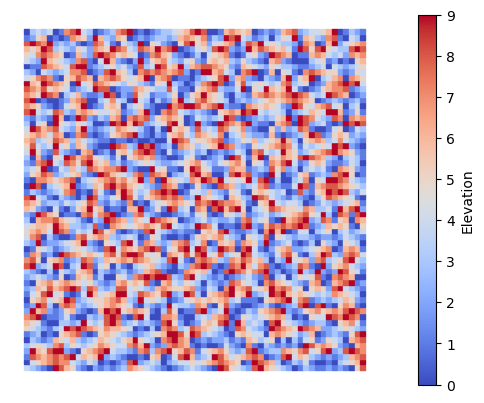

In [92]:
def plot_topo(topo):
    plt.figure()
    scatter = plt.scatter(Xs(topo), Ys(topo), c=list(topo.values()), 
                          cmap='coolwarm', marker='s', s=12)
    plt.colorbar(scatter, label='Elevation')
    plt.axis('square')
    plt.axis('off')

plot_topo(topo)

# [Day 11](https://adventofcode.com/2024/day/11): Plutonian Pebbles

Today's narrative involves a straight line of stones, each of which has a number enscribed on it. The input is a single line of these numbers:

In [94]:
stones = the(parse(11, ints))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 str:
────────────────────────────────────────────────────────────────────────────────────────────────────
0 27 5409930 828979 4471 3 68524 170
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1 tuple:
────────────────────────────────────────────────────────────────────────────────────────────────────
(0, 27, 5409930, 828979, 4471, 3, 68524, 170)


### Part 1: How many stones will you have after blinking 25 times?

Every time you blink, the stones appear to change, according to these rules:
- A stone marked 0 changes to 1.
- Otherwise, a stone with an even number of digits splits into two stones, with the first and second halves of those digits.
- Otherwise, the stone's number is multiplied by 2024.

<img src="https://pbs.twimg.com/media/GejUQBgWIAAUtDf?format=jpg&name=medium" width=400>


I'll define `blink` to simulate the effect of a given number of blinks, and `change_stone` to change a single stone, returning a list of wither one or two stones (the two stones computed by `split_stone`):

In [96]:
def blink(stones: Ints, blinks=25) -> List[int]:
    """Simulate the changes in the list of stones after blinking `blinks` times."""
    for _ in range(blinks):
        stones = append(map(change_stone, stones))
    return stones
    
def change_stone(stone: int) -> List[int]:
    """Change a single stone into one or two, according to the rules."""
    digits = str(stone)
    return ([1]                 if stone == 0           else
            split_stone(digits) if len(digits) % 2 == 0 else
            [stone * 2024])

def split_stone(digits: str) -> List[int]:
    """Split a stone into two halves."""
    half = len(digits) // 2
    return [int(digits[:half]), int(digits[half:])]

In [97]:
answer(11.1, 194482, lambda:
       len(blink(stones)))

Puzzle 11.1:   .0680 seconds, answer 194482          ok

### Part 2: How many stones would you have after blinking a total of 75 times?

It looks like the number of stones is roughly doubling every 1 or 2 blinks, so for 75 blinks we could have trillions of stones. I'd like something more efficient. I note that:
- Although the puzzle makes it clear that the stones are in a line, it turns out their position in the line is irrelevant.
- Because all the even-digit numbers get split in half, it seems like many small numbers will appear multiple times.
- (In the given example, after 6 blinks the number 2 appears 4 times.)
- Therefore, I'll keep a `Counter` of stones rather than a `list` of stones.

In [99]:
def blink2(stones: Ints, blinks=25) -> Counter:
    """Simulate the changes after blinking `blinks` times and return a Counter of stones."""
    counts = Counter(stones)
    for _ in range(blinks):
        counts = accumulate((s, counts[stone]) 
                            for stone in counts 
                            for s in change_stone(stone))
    return counts

Now we can re-run Part 1 (it should be slightly faster), and run Part 2 without fear of having trillion-element lists:

In [101]:
answer(11.1, 194482, lambda:
       total(blink2(stones, 25)))

Puzzle 11.1:   .0016 seconds, answer 194482          ok

In [102]:
answer(11.2, 232454623677743, lambda:
       total(blink2(stones, 75)))

Puzzle 11.2:   .0609 seconds, answer 232454623677743 ok

Again, I did pretty well, with no errors, and moving at what I thought was a good pace, but I didn't even crack the top 2000 on the leaderboard. I guess I spent too much time writing docstrings and type hints, and refactoring as I went.

# [Day 12](https://adventofcode.com/2024/day/12): Garden Groups

Today's input is yet another 2D map. This one depicts different garden plots on a farm, each plot planted with a crop, indicated by a letter (maybe "I" is iceberg lettuce and "U" is udo, and so on):

In [105]:
farm = Grid(parse(12))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 140 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
IIIIIIIIIIIIIIIIIIIIIUUUUUUUUJLLLLAAAAAAMMMAUUUUPPXPZZZZZZZZZZZXXXXXXXXXXXXXXXXXXXXXFFFFFFFFFFZZ ...
IIIIIIIIIIIIIIIIIIIIUUUUUUUUUJALEAAAAAAAAAAAAUUUUPXPPZZZZZHHHHHHXHXXXXXXXXXXXXXXXXXXFXFFFFFFFFZZ ...
IIIIIIIIIIIIIIIIIIIIUUUUUUUUUJAAAAAAAAAAAAAAUUPPPPPPPZZZZZZZHHHHHHHXXXXXXXXXXXXXXXXXXXFFFFFFFFFZ ...
IIIIIIIIIIIAAIIIIIIIIIUUUUUUUJJAAAAAAAAAAAAAAVVPPPPPPPPZHHHHHHHHHHHXXXXXXXXXXXXXXXXXFFFFFFFFFFFZ ...
IOOIIIIIIIIAAIIIIIIIIIIUUUQVUJJAAAAAAAAAAAAAEVVZPPPPPPPHHHHHHHHHHHHXXXXXXXXXXXXXXXXXXXXFFFFFFLLL ...
OOOOOOOOIIAAAAAIIIIIIIIUQQQQVQJAAAAAAAAAAAAAAVVPPPPPIIHHHHHHHHHHHHHXXXXXUXXXXXXUUXXBBBSFFFLLLLLL ...
OOOOOOOOIAAAAAAIIIIIIQQQQQQQQQQQEADDAAAAAAAAHHVVPPPIIIIHHHHHHHHHHHHHXXXUUUUUXXUUUXXBBBSFFFLLELLL ...
OOOOOOOOIIIAAIIIIIQQQQQQQQQQTQJQEEDDDAAAAAAHHVVVVPIIIIIHHHHHHHHHHH

### Part 1: What is the total price of fencing all regions on your map?

We are asked to calculate the cost of putting fences around each **region** (a region is a set of plots with the same crop that abut each other horizontally or vertically). The price of the fence for a region is defined as the product of the region's area and its perimeter. If we represent a region as a set of (x, y) points, then the area is easy: it is just the number of points. The perimeter length can be computed by, for each plot point in the region, looking at each of the four directions and counting cases where the adjacent plot in that direction is *not* in the region. (Initially I had a **bug** in that I looked at the `farm.neighbors` of each plot. That doesn't work because a plot on the edge of the grid should count as part of the perimeter.)

In [107]:
Region = Set[Point]
region_area = len

def fence_price(farm: Grid) -> int:
    """Total price of fences for all the regions in the farm."""
    return sum(map(region_price, regions(farm)))

def region_price(region) -> int: return region_area(region) * perimeter_length(region)

def perimeter_length(region: Region) -> int:
    """The number of sides on the perimeter of the region."""
    return quantify(add2(plot, d) not in region for plot in region for d in directions4)

To find all the regions I'll start at a point and do a [flood fill](https://en.wikipedia.org/wiki/Flood_fill) to neighboring points with the same region letter, keeping track of points that have already been found so as to not duplicate them. The function `regions` iterates over all points to make sure it finds every region, and `flood_fill` recursively expands to all points that neighbor `p` and have the same crop (letter). This function mutates the set `already_found` as it goes (and also mutates the `region` it is building up).

In [109]:
def regions(farm: Grid) -> List[Region]:
    """Find all the regions in the farm."""
    already_found = set() # Set of plots already accounted for
    return [flood_fill(p, farm, set(), already_found) 
            for p in farm if p not in already_found]

def flood_fill(p: Point, grid: Grid, region: set, already_found: set) -> set:
    """Starting at point p, recursively add all neighboring points to `region`, keeping track of `already_found`."""
    if p not in already_found:
        region.add(p)
        already_found.add(p)
        for p2 in grid.neighbors(p):
            if farm[p2] == farm[p]:
                flood_fill(p2, grid, region, already_found)
    return region

In [110]:
answer(12.1, 1402544, lambda:
       fence_price(farm))

Puzzle 12.1:   .0332 seconds, answer 1402544         ok

### Part 2: What is the new total price of fencing all regions on your map, with the bulk discount?

In Part 2 we get a **bulk discount** on the fencing; we only need to pay for the number of straight line sides on the perimeter, not the total length of the perimeter. For example, a 10 x 10 square has perimeter 40, but has only 4 sides; that's a 90% discount!

It took me a while to figure out a good approach for this. At first I was reminded of the Convex Hull problem, for which I have [a notebook](https://github.com/norvig/pytudes/blob/main/ipynb/Convex%20Hull.ipynb). But that's not really appropriate here; our regions could be non-convex, and the set of points in a region are not the same as the vertexes of a polygon (e.g., a region with one point has 4 sides, not 0).

A better idea is to start with the perimeter length and subtract one for every case in which a points has an edge in one direction (e.g., an edge to the North) and also has a neighbor with the same edge. To be precise, I'll look for four cases:
- A point with an edge to the North whose neighbor to the East also has an edge to the North
- A point with an edge to the East whose neighbor to the South also has an edge to the East
- A point with an edge to the South whose neighbor to the West also has an edge to the South
- A point with an edge to the West whose neighbor to the North also has an edge to the West

Here are two diagrams of two regions with "`X`" and "`W`" crops with a "`-`" marking each place where a perimeter piece would be subtracted.

     .X-...    .-------..
     -X-.X-    .WWWWWWWW-
     -XXXX-    -WWWWWWWW-
     ..XXX.    -WWWWWWWW.
     ...--.    ..-------.

I'll parameterize `fence_price` to take a `region_price` parameter, and show that the change is backwards compatible to Part 1:

In [112]:
def fence_price(farm: Grid, region_price=region_price) -> int:
    """Total price of fences for all the regions in the farm, given the price function for a region."""
    return sum(map(region_price, regions(farm)))

def discount_region_price(region) -> int: return region_area(region) * region_sides(region)
    
def region_sides(region):
    """How many straight-line sides does this region have?"""
    def has_edge(p: Point, d: Vector): return p in region and add2(p, d) not in region
    def neighbor(p: Point, d: Vector): return add2(p, make_turn(d, 'R'))
    subtract = quantify(has_edge(p, d) and has_edge(neighbor(p, d), d)
                        for p in region
                        for d in directions4)
    return perimeter_length(region) - subtract

In [113]:
answer(12.1, 1402544, lambda:
       fence_price(farm))

Puzzle 12.1:   .0307 seconds, answer 1402544         ok

In [114]:
answer(12.2, 862486, lambda: 
       fence_price(farm, discount_region_price))

Puzzle 12.2:   .0436 seconds, answer 862486          ok

# [Day 13](https://adventofcode.com/2024/day/13): Claw Contraption

Today's puzzle involves arcade claw machines. Each input paragraph describes a machine with two buttons, **A** and **B**; every push of a button moves the claw a specified amount in the X and Y directions. The prize is at a specified location. We can parse the input by defining a `parse_claw` function and a `Claw` datatype to represent a claw machine:

In [116]:
Claw = namedtuple('Claw', 'A, B, Prize') # A claw machine

def parse_claw(text: str) -> Claw:
    """Parse a description into a Claw object."""
    ax, ay, bx, by, px, py = ints(text)
    return Claw((ax, ay), (bx, by), (px, py))
    
claws = parse(13, parse_claw, sections=paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1279 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
Button A: X+24, Y+19
Button B: X+32, Y+86
Prize: X=1072, Y=2062

Button A: X+70, Y+12
Button B: X+11, Y+43
Prize: X=3400, Y=3872

...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 320 Claws:
────────────────────────────────────────────────────────────────────────────────────────────────────
Claw(A=(24, 19), B=(32, 86), Prize=(1072, 2062))
Claw(A=(70, 12), B=(11, 43), Prize=(3400, 3872))
Claw(A=(48, 77), B=(34, 12), Prize=(6510, 1583))
Claw(A=(76, 60), B=(29, 88), Prize=(5506, 6300))
Claw(A=(16, 75), B=(68, 20), Prize=(17148, 13490))
Claw(A=(46, 13), B=(33, 63), Prize=(15572, 9644))
Claw(A=(21, 79), B=(44, 32), Prize=(2433, 5147))
Claw(A=(13, 45), B=(36, 11), Prize=(4612, 19164))
...


### Part 1: What is the fewest tokens you would have to spend to win all possible prizes?

We are told that for some machines it is possible to reach the prize and others it is impossible. We are also told that you need to spend 3 tokens to  press  the **A** button and 1 token to press the **B** button. There is a hint that no button will need to be pushed more than 100 times. It is usually a good idea to accept the hint, so I will  do the following:
- Exhaustively try from every number from 0 to 100 presses of the **A** button.
- For each number, figure out what the resulting position of the claw would be after those presses.
- Calculate how many presses of the **B** button would be required to get to the prize's X location.
- If the number of presses is an integer, and would also arrive at the prize's Y location, then yield that solution.
- Out of these solutions, the cheapest solution is  the one that needs the fewest tokens.
- (If there are no solutions, `cheapest_solution` will return 0, whcih is convenient for adding the results up.)

In [118]:
def solve_claw(claw: Claw, limit=100) -> Iterable[Tuple[int, int]]:
    """All possible (A-presses, B-presses) solutions to reach the prize on this machine."""
    A, B, Prize = claw
    for Apresses in range(limit + 1):
        pos = mul(A, Apresses)
        if X_(pos) > X_(Prize) or Y_(pos) > Y_(Prize):
            return
        diff = sub2(Prize, pos)
        Bpresses = X_(diff) / X_(B)
        if Bpresses.is_integer() and Bpresses * Y_(B) == Y_(diff):
            yield (Apresses, int(Bpresses))

def cheapest_solution(claw: Claw) -> int: 
    """The minimum cost out of every possible solution to this claw machine."""
    return min((3 * A + 1 * B for (A, B) in solve_claw(claw)), default=0)

In [119]:
answer(13.1, 29598, lambda:
       sum(map(cheapest_solution, claws)))

Puzzle 13.1:   .0098 seconds, answer 29598           ok

### Part 2: What is the fewest tokens you would have to spend to win all possible prizes, now?

In Part 2, we discover that the prize is actually much farther away, by 10,000,000,000,000 (ten trillion) steps in both the X and Y coordinates. Theoretically, we could still use `solve_claw` with a bigger `limit`, but that would take a *long* time.

Instead I can solve each claw machine *mathematically* rather than by trial and error. I know that an equation over the integers is called a [Diophantine equation](https://en.wikipedia.org/wiki/Diophantine_equation), but I don't remember much about them.  What are the equations of a claw machine? For my first machine, 

     Button A: X+24, Y+19
     Button B: X+32, Y+86
     Prize: X=1072, Y=2062

there are two linear equations to solve simultaneously:

     24 A + 32 B = 1072
     19 A + 86 B = 2062

In general, two linear equations in two unknowns can have zero solutions (if the lines are parallel), an infinite number of solutions (if the lines are the same), or exactly one solution (otherwise). The further constraint that *A* and *B* have to be non-negative integers may rule out some of these solutions, but mostly we are looking for the one point where two lines intersect.

I defined `solve_claw` to yield multiple solutions, but let's see how many solutions each claw machine yields:

In [121]:
Counter(quantify(solve_claw(c)) for c in claws)

Counter({0: 168, 1: 152})

So, what is the intersection point of two lines? You could [look it up](https://www.wolframalpha.com/input?i=solve+for+a%2C+b%3A+p+*+a+%2B+q+*+b+%3D+r++and+++s+*+a+%2B+t+*+b+%3D+u) or work it out by hand. Given the two equations over the two variables *a* and *b*:

    p * a + q * b = r
    s * a + t * b = u

The solution is:

    a = (r * t - q * u) / (p * t - q * s)
    b = (r * s - p * u) / (q * s - p * t)

So we can rewrite `solve_claw` to use this:

In [123]:
def solve_claw(claw: Claw) -> Iterable[Tuple[int, int]]:
    """All possible (A-presses, B-presses) solutions to reach the prize on this machine."""
    ((p, s), (q, t), (r, u)) = claw
    a = (r * t - q * u) / (p * t - q * s)
    b = (r * s - p * u) / (q * s - p * t)
    if a >= 0 and b >= 0 and a.is_integer() and b.is_integer():
        yield (int(a), int(b))

We'll need a function to move the claws further away, then we're ready to answer Part 2:

In [125]:
def move_prize(claw, delta=(10**13, 10**13)) -> Claw:
    """Move the claw's prize by the given displacement, delta."""
    return claw._replace(Prize=(add(claw.Prize, delta)))

In [126]:
answer(13.2, 93217456941970, lambda:
       sum(cheapest_solution(move_prize(claw)) for claw in claws))

Puzzle 13.2:   .0004 seconds, answer 93217456941970  ok

The refactored `solve_claw` is compatible with Part 1, and should be a bit faster:

In [128]:
answer(13.1, 29598, lambda:
       sum(map(cheapest_solution, claws)))

Puzzle 13.1:   .0002 seconds, answer 29598           ok

# Summary

So far, I've solved all the puzzles. Most of them run in well under a second, but three of them take over a second.

In [130]:
for d in sorted(answers):
    print(answers[d])

Puzzle  1.1:   .0001 seconds, answer 1830467         ok
Puzzle  1.2:   .0001 seconds, answer 26674158        ok
Puzzle  2.1:   .0004 seconds, answer 257             ok
Puzzle  2.2:   .0022 seconds, answer 328             ok
Puzzle  3.1:   .0005 seconds, answer 156388521       ok
Puzzle  3.2:   .0004 seconds, answer 75920122        ok
Puzzle  4.1:   .0337 seconds, answer 2401            ok
Puzzle  4.2:   .0266 seconds, answer 1822            ok
Puzzle  5.1:   .0007 seconds, answer 5762            ok
Puzzle  5.2:   .0009 seconds, answer 4130            ok
Puzzle  6.1:   .0016 seconds, answer 5329            ok
Puzzle  6.2:  1.9691 seconds, answer 2162            ok
Puzzle  7.1:   .0211 seconds, answer 1985268524462   ok
Puzzle  7.2:  1.0677 seconds, answer 150077710195188 ok
Puzzle  8.1:   .0028 seconds, answer 220             ok
Puzzle  8.2:   .0030 seconds, answer 813             ok
Puzzle  9.1:   .0200 seconds, answer 6332189866718   ok
Puzzle  9.2:  2.6991 seconds, answer 63536483907